<a href="https://colab.research.google.com/github/ekaterina-epetrova/Conference-Info/blob/master/SOP4_RNA_purification_by_Invitrogen%E2%84%A2%20TRIzol%E2%84%A2%20Plus%20RNA%20Purification%20Kit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Summary**

This protocol outlines the steps required to extract total RNA from sorted or non-sorted porcine Peripheral Blood Mononuclear Cells (PBMCs). The PBMCs are isolated following SOP_1 and potentially sorted as described in SOP_2. If frozen, thaw the PBMCs as described in SOP_3. The RNA yield depends on the amount of starting material and varies based on cell concentration and sample quality.

Due to biosafety considerations (export from BSL4), PBMCs are resuspended in TRIzol™ Reagent before RNA extraction. Samples can be processed immediately or stored at -20°C until export. Subsequent processing uses the TRIzol™ Plus RNA Purification Kit.

## **Key Resources Table**

| **Reagent or Resource**                     | **Source**                     | **Identifier**            | **Other Information**                |
|---------------------------------------------|--------------------------------|---------------------------|---------------------------------------|
| **Chemicals and Kits**                               |                                |                           |                                       |
| TRIzol™ Plus RNA Purification Kit | Fisher Scientific | 12094346 | Trizol Reagent should be shaked before use |
| Chloroform | Sigma-Aldrich | C2432 | |
| Ethanol | Sigma-Aldrich | E7023 | |
| Nuclease-free water | Sigma-Aldrich | E7023 | |                   |
| **Experimental Models: Organisms Strains** | | | |
| Porcine PBMCs | N/A | N/A | Isolated as described in SOP_1, SOP_2, SOP_3 |
 **Other** | | | |
| RNase-free Eppendorf Tubes | Thermo Fisher Scientific | 0030-10-03 | |


## Step-by-Step Method Details

### **Before beginning**:
1. Pre-set centrifuges to the appropriate temperatures (4°C and RT).
2. Prepare 70% ethanol

### **Sample Preparation**:
1. Following SOP3, centrifuge the PBMCs at 300 × g for 5 minutes at RT.
2. Resuspend the cell pellet in ice-cold PBS at a concentration of 7.5 × 10^6 cells/mL. Gently pipette to avoid mechanical stress.
3. Transfer 1 mL of the cell suspension to RNase-free Eppendorf tubes.
4. Centrifuge the cells at 300 × g for 5 minutes at 4°C.
5. Resuspend the cell pellet in 1 mL of TRIzol™ Reagent. Pipette gently to avoid RNA shearing.
6. Incubate samples at RT for 5 minutes to ensure complete lysis and RNA release.
7. If the sample contains particulate matter, centrifuge at 12,000 × g for 5 minutes at 4°C and transfer the clear supernatant to a new RNase-free Eppendorf tube.
8. Store the sample at -20°C if needed. Avoid repeated freeze-thaw cycles.

### **TRIzol™/Chloroform RNA Extraction**
1. Add 0.2 mL of chloroform per 1 mL of TRIzol™ Reagent used for lysis. Securely cap the tube.
2. Shake vigorously for 15 seconds, then incubate for 3 minutes at RT.
3. Centrifuge at 12,000 × g for 15 minutes at 4°C to separate the mixture into three layers:
   - **Upper aqueous phase** (contains RNA) – clear
   - **Middle interphase** (contains DNA) – white
   - **Lower organic phase** (contains proteins) – pink
4. Carefully transfer ~600 µL of the upper aqueous phase to a new RNase-free tube.

### **RNA Purification Using TRIzol™ Plus RNA Purification Kit**
1. Add an equal volume of 70% ethanol to the aqueous phase and mix well by vortexing. Transfer up to 700 µL of the mixture to a spin cartridge.
2. Centrifuge at 12,000 × g for 15 seconds. Discard the flow-through. Repeat if necessary until the entire sample is processed.
3. Wash RNA:
   - Add 700 µL of Wash Buffer I to the spin cartridge and centrifuge at 12,000 × g for 15 seconds. Discard the flow-through and the collextion tube.
   - Add 500 µL of Wash Buffer II, centrifuge at 12,000 × g for 15 seconds, and discard the flow-through. Repeat this wash step once more.
4. Centrifuge the cartridge at 12,000 × g for 2 minute to dry the membrane. Discard the collection tube.
5. Elute RNA:
   - Transfer the spin cartridge to a new recovery tube.
   - Add 30 µL RNase-free water directly onto the membrane. Incubate for 1 minute at RT.
   - Centrifuge at 12,000 × g for 2 minutes to elute the RNA.
6. Discard the spin cartridge and store the eluted RNA at -80°C for long-term storage or on ice for immediate use.


**Compare RNA yield**

<ipython-input-9-c1ca75d8c482>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-9-c1ca75d8c482>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-9-c1ca75d8c482>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


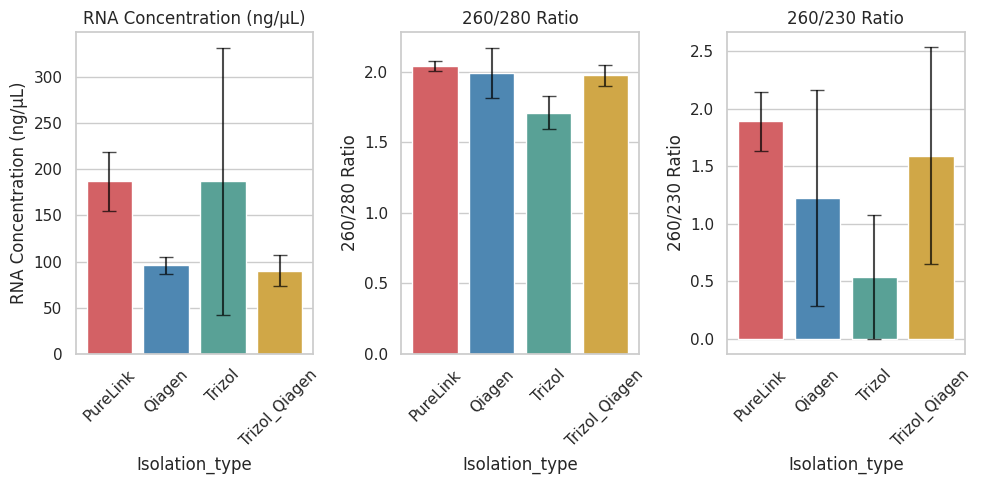

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Color palette
colors = ['#E64E53', '#3D89C3', '#4DAD9E', '#E7B030']

# Path to the uploaded file
file_path = '/content/RNA_samples_isolation_comparison.csv'

# Load the CSV file into a DataFrame
df = pd.read_csv(file_path, sep=';')

# Calculate statistics
stats = df.groupby('Isolation_type').agg(['mean', 'std']).reset_index()

# Flatten MultiIndex columns
stats.columns = ['Isolation_type', 'RNA_ng_ul_mean', 'RNA_ng_ul_std',
                 '260/280_mean', '260/280_std', '260/230_mean', '260/230_std']

# Define parameters for plotting
parameters = ['RNA_ng_ul', '260/280', '260/230']
titles = ['RNA Concentration (ng/µL)', '260/280 Ratio', '260/230 Ratio']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(10, 5))

for i, param in enumerate(parameters):
    sns.barplot(
        x='Isolation_type',
        y=f'{param}_mean',
        data=stats,
        ax=axes[i],
        palette=colors,
        capsize=0.1
    )
    axes[i].errorbar(
        x=stats['Isolation_type'],
        y=stats[f'{param}_mean'],
        yerr=stats[f'{param}_std'],
        fmt='none',
        capsize=5,
        color='black',
        alpha=0.7
    )
    axes[i].set_title(titles[i])
    axes[i].set_ylabel(titles[i])
    axes[i].set_xlabel('Isolation_type')
    axes[i].tick_params(axis='x', rotation=45)


# Adjust layout
plt.tight_layout()

# Save figure as PDF
plt.savefig('/content/RNA_samples_comparison.pdf', format='pdf',facecolor='white')

# Show the plot
plt.show()